<a href="https://colab.research.google.com/github/Ankittgup/Airbnb-data-analysis/blob/main/Copy_of_Airbnb_Bookings_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present a more unique, personalized way of experiencing the world. Today, Airbnb became one of a kind service that is used and recognized by the whole world. Data analysis on millions of listings provided through Airbnb is a crucial factor for the company. These millions of listings generate a lot of data - data that can be analyzed and used for security, business decisions, understanding of customers' and providers' (hosts) behavior and performance on the platform, guiding marketing initiatives, implementation of innovative additional services and much more. </b>

## <b>This dataset has around 49,000 observations in it with 16 columns and it is a mix between categorical and numeric values. </b>

## <b> Explore and analyze the data to discover key understandings (not limited to these) such as : 
* What can we learn about different hosts and areas?
* What can we learn from predictions? (ex: locations, prices, reviews, etc)
* Which hosts are the busiest and why?
* Is there any noticeable difference of traffic among different areas and what could be the reason for it? </b>

In [118]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [119]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline



In [120]:
df=pd.read_csv('/content/drive/MyDrive/Almabetter/capstone project/module - 1 python/Airbnb NYC 2019.csv')

Part - 1 Data Cleaning

In [121]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [122]:
df.tail()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2
48894,36487245,Trendy duplex in the very heart of Hell's Kitchen,68119814,Christophe,Manhattan,Hell's Kitchen,40.76404,-73.98933,Private room,90,7,0,NaN,NaN,1,23


In [123]:
df.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

In [124]:
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [125]:
df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [126]:
df['last_review']=pd.to_datetime(df['last_review'])
df['Quarter']=df['last_review'].dt.month
df['Quarter'].value_counts()


6.0     13589
7.0      5937
5.0      4701
1.0      2773
4.0      2109
12.0     1770
8.0      1667
10.0     1546
9.0      1535
3.0      1288
11.0     1158
2.0       770
Name: Quarter, dtype: int64

In [127]:
df['Quarter'].fillna(df['Quarter'].mode()[0],inplace=True)

In [128]:
df['name'].fillna('Not Known', inplace=True)
df['host_name'].fillna('Not Known', inplace=True)
df.isnull().sum()

id                                    0
name                                  0
host_id                               0
host_name                             0
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
Quarter                               0
dtype: int64

In [129]:
df['reviews_per_month'].fillna(df['reviews_per_month'].mean(),inplace=True)
df.isnull().sum()

id                                    0
name                                  0
host_id                               0
host_name                             0
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                     0
calculated_host_listings_count        0
availability_365                      0
Quarter                               0
dtype: int64

In [130]:
df['minimum_nights']=df["minimum_nights"].apply(lambda x:round(df['minimum_nights'].mean()) if x>365 else x)

In [131]:
df['price']=df["price"].apply(lambda x:round(df['price'].mean()) if x==0 else x)

In [132]:
Quarter={1:'Q1',2:'Q1',3:'Q1',4:'Q2', 5:'Q2', 6:'Q2', 7:'Q3', 8:'Q3', 9:'Q3', 10:'Q4', 10:'Q4', 11:'Q4', 12:'Q4'}
df['Quarter']=df['Quarter'].map(Quarter)

In [133]:
# Dropping Unwanted Columns
columns=['id','last_review']
df.drop(columns, axis=1,inplace=True)
df.head()

,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,Quarter
0,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.210000,6,365,Q4
1,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.380000,2,355,Q2
2,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,1.373221,1,365,Q2
3,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.640000,1,194,Q3
4,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.100000,1,0,Q4


#               ======================Data Cleaning Done==========


1. Top 10 host id with most number of listing
2. Which neighbourhood Group has most number of listing
3. which room types people prefer in each neighbourhood group
4. Find the average price in every neighbourhood_group with respective to room type

5. What is the maximum , minimum for each neighbourhood_group

6. Most Expensive host with less availability

7. Top 5 host with high profit

8. Total no. of nights spend per room types

9. Most Expensive hosts are Americans or not in Each neighbourhood_group

10. Which quarter has most number of listings ?

11. Which quarter has most avg number of reviews?

12. what is the average availability in each Quarter with respective neighbourhood_group ?

13. which quarter have the highest profits earned?

14. mlist out the most expensive host for each quarter

15. Find out the correlation between the features

16. find which part of NYC has more number of listings and their geographical advantages?

In [134]:
# Top 10 host id with most no listings
top_10_host=pd.DataFrame()
top_10_host['host_id']=df['host_id'].value_counts().index
top_10_host['number_of_listing']=df['host_id'].value_counts().values
top_10_host.head(10)

,host_id,number_of_listing
0,219517861,327
1,107434423,232
2,30283594,121
3,137358866,103
4,16098958,96
5,12243051,96
6,61391963,91
7,22541573,87
8,200380610,65
9,7503643,52


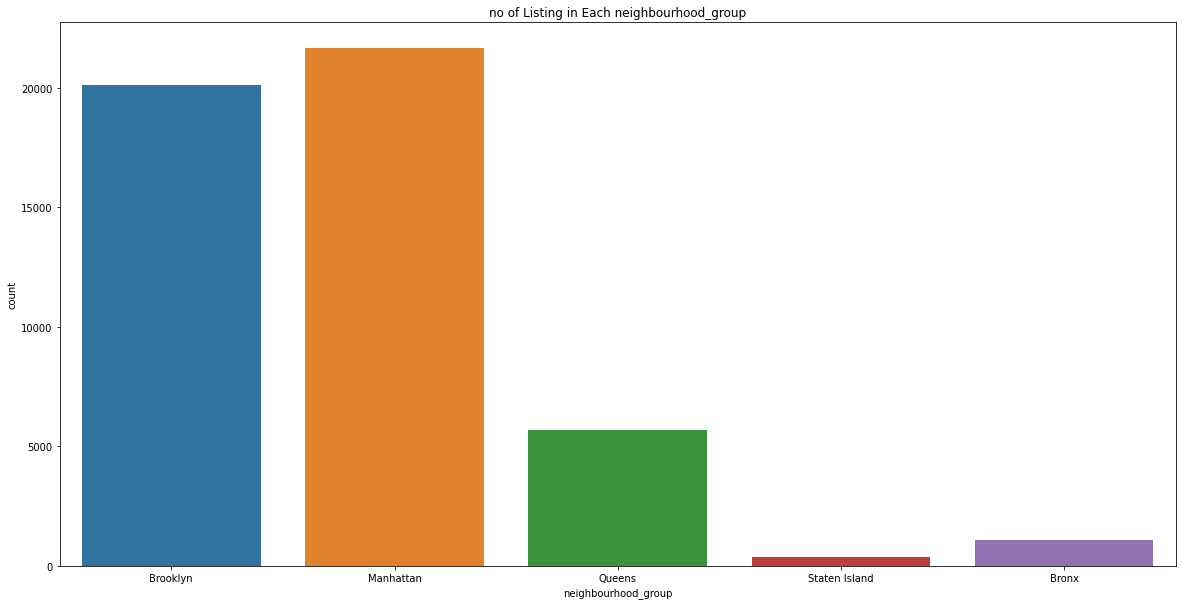

In [135]:
# Which neighbourhood Group has most number of listing
fig=plt.figure(figsize=(20,10))
g=sns.countplot(data=df,x='neighbourhood_group')
plt.title('no of Listing in Each neighbourhood_group')
fig.show(g)

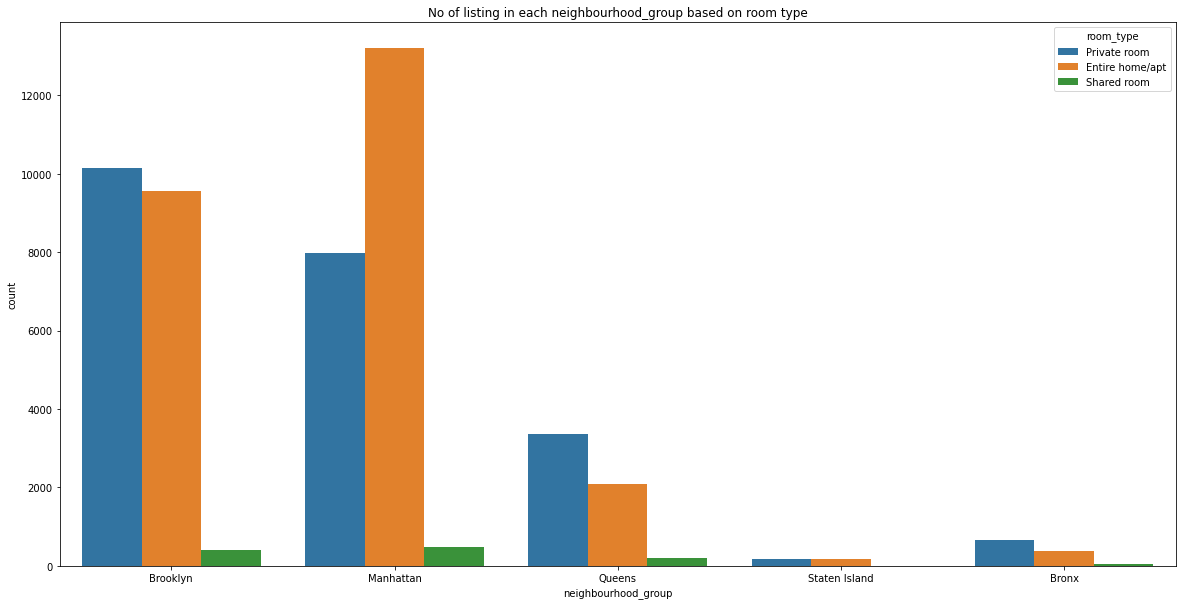

In [136]:
# which room types people prefer in each neighbourhood_group
fig=plt.figure(figsize=(20,10))
g=sns.countplot(data=df,x='neighbourhood_group',hue='room_type')
plt.title('No of listing in each neighbourhood_group based on room type')
fig.show(g)

In [137]:
# find the average price in every neighbourhood_group with respective to room type
avg_price_of_the_room=df.groupby(['neighbourhood_group','room_type'],as_index=False)['price'].mean()
avg_price_of_the_room

,neighbourhood_group,room_type,price
0,Bronx,Entire home/apt,127.506596
1,Bronx,Private room,67.023006
2,Bronx,Shared room,59.800000
3,Brooklyn,Entire home/apt,178.343551
4,Brooklyn,Private room,76.590703
5,Brooklyn,Shared room,51.268765
6,Manhattan,Entire home/apt,249.250701
7,Manhattan,Private room,116.776622
8,Manhattan,Shared room,88.977083
9,Queens,Entire home/apt,147.050573


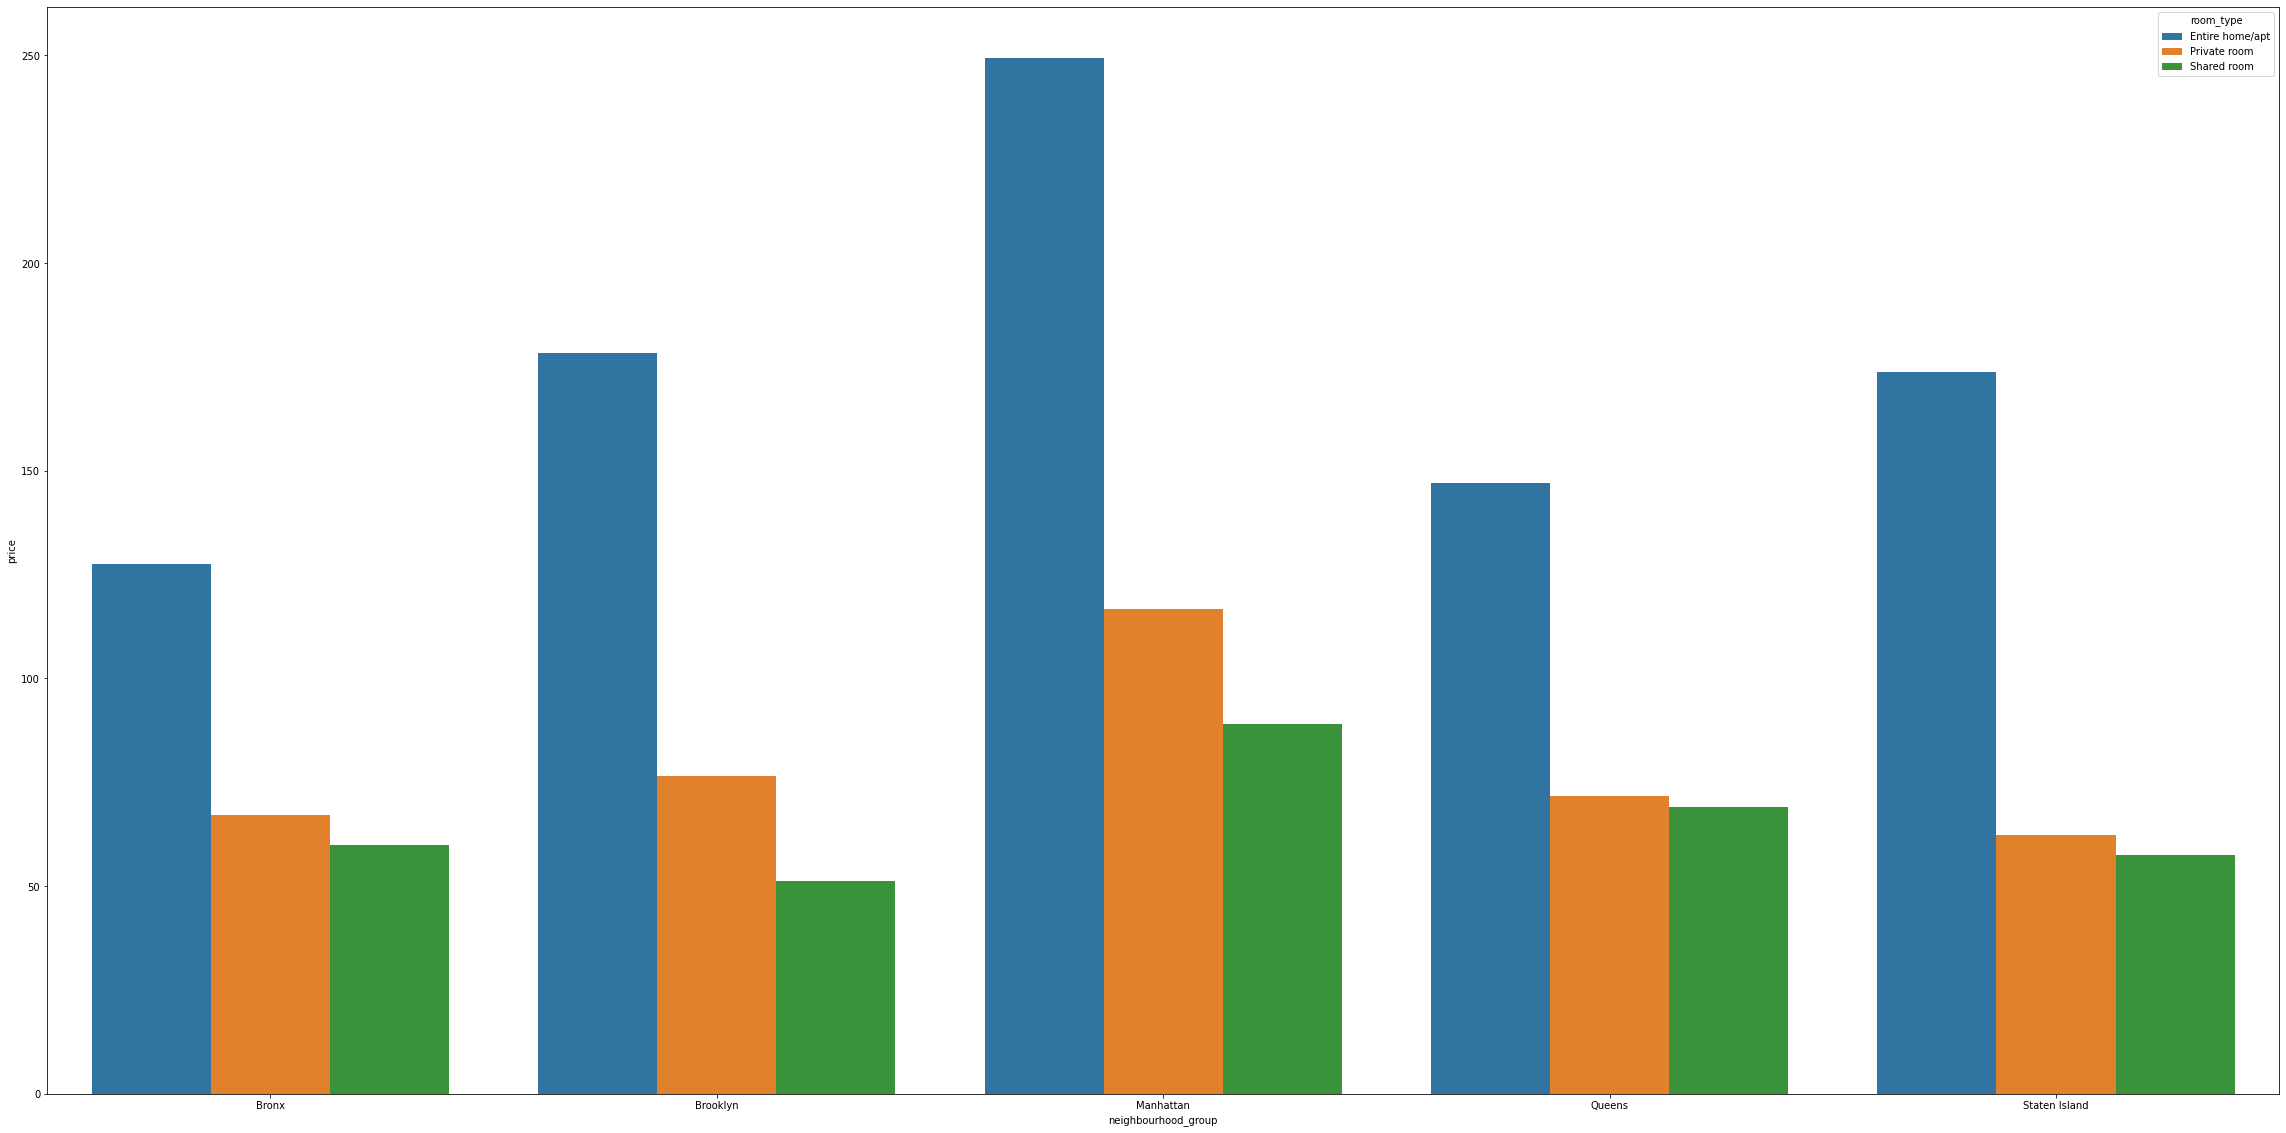

In [138]:
fig=plt.figure(figsize=(40,20))
g=sns.barplot(data=avg_price_of_the_room,x='neighbourhood_group',y='price',hue='room_type')
fig.show(g)

In [139]:
#What is the maximum , minimum for each neighbourhood_group
max_min_df=df.groupby(by='neighbourhood_group').agg({'price':['max','min']})
max_min_df


price    
                       max min
neighbourhood_group           
Bronx                 2500  10
Brooklyn             10000  10
Manhattan            10000  10
Queens               10000  10
Staten Island         5000  13

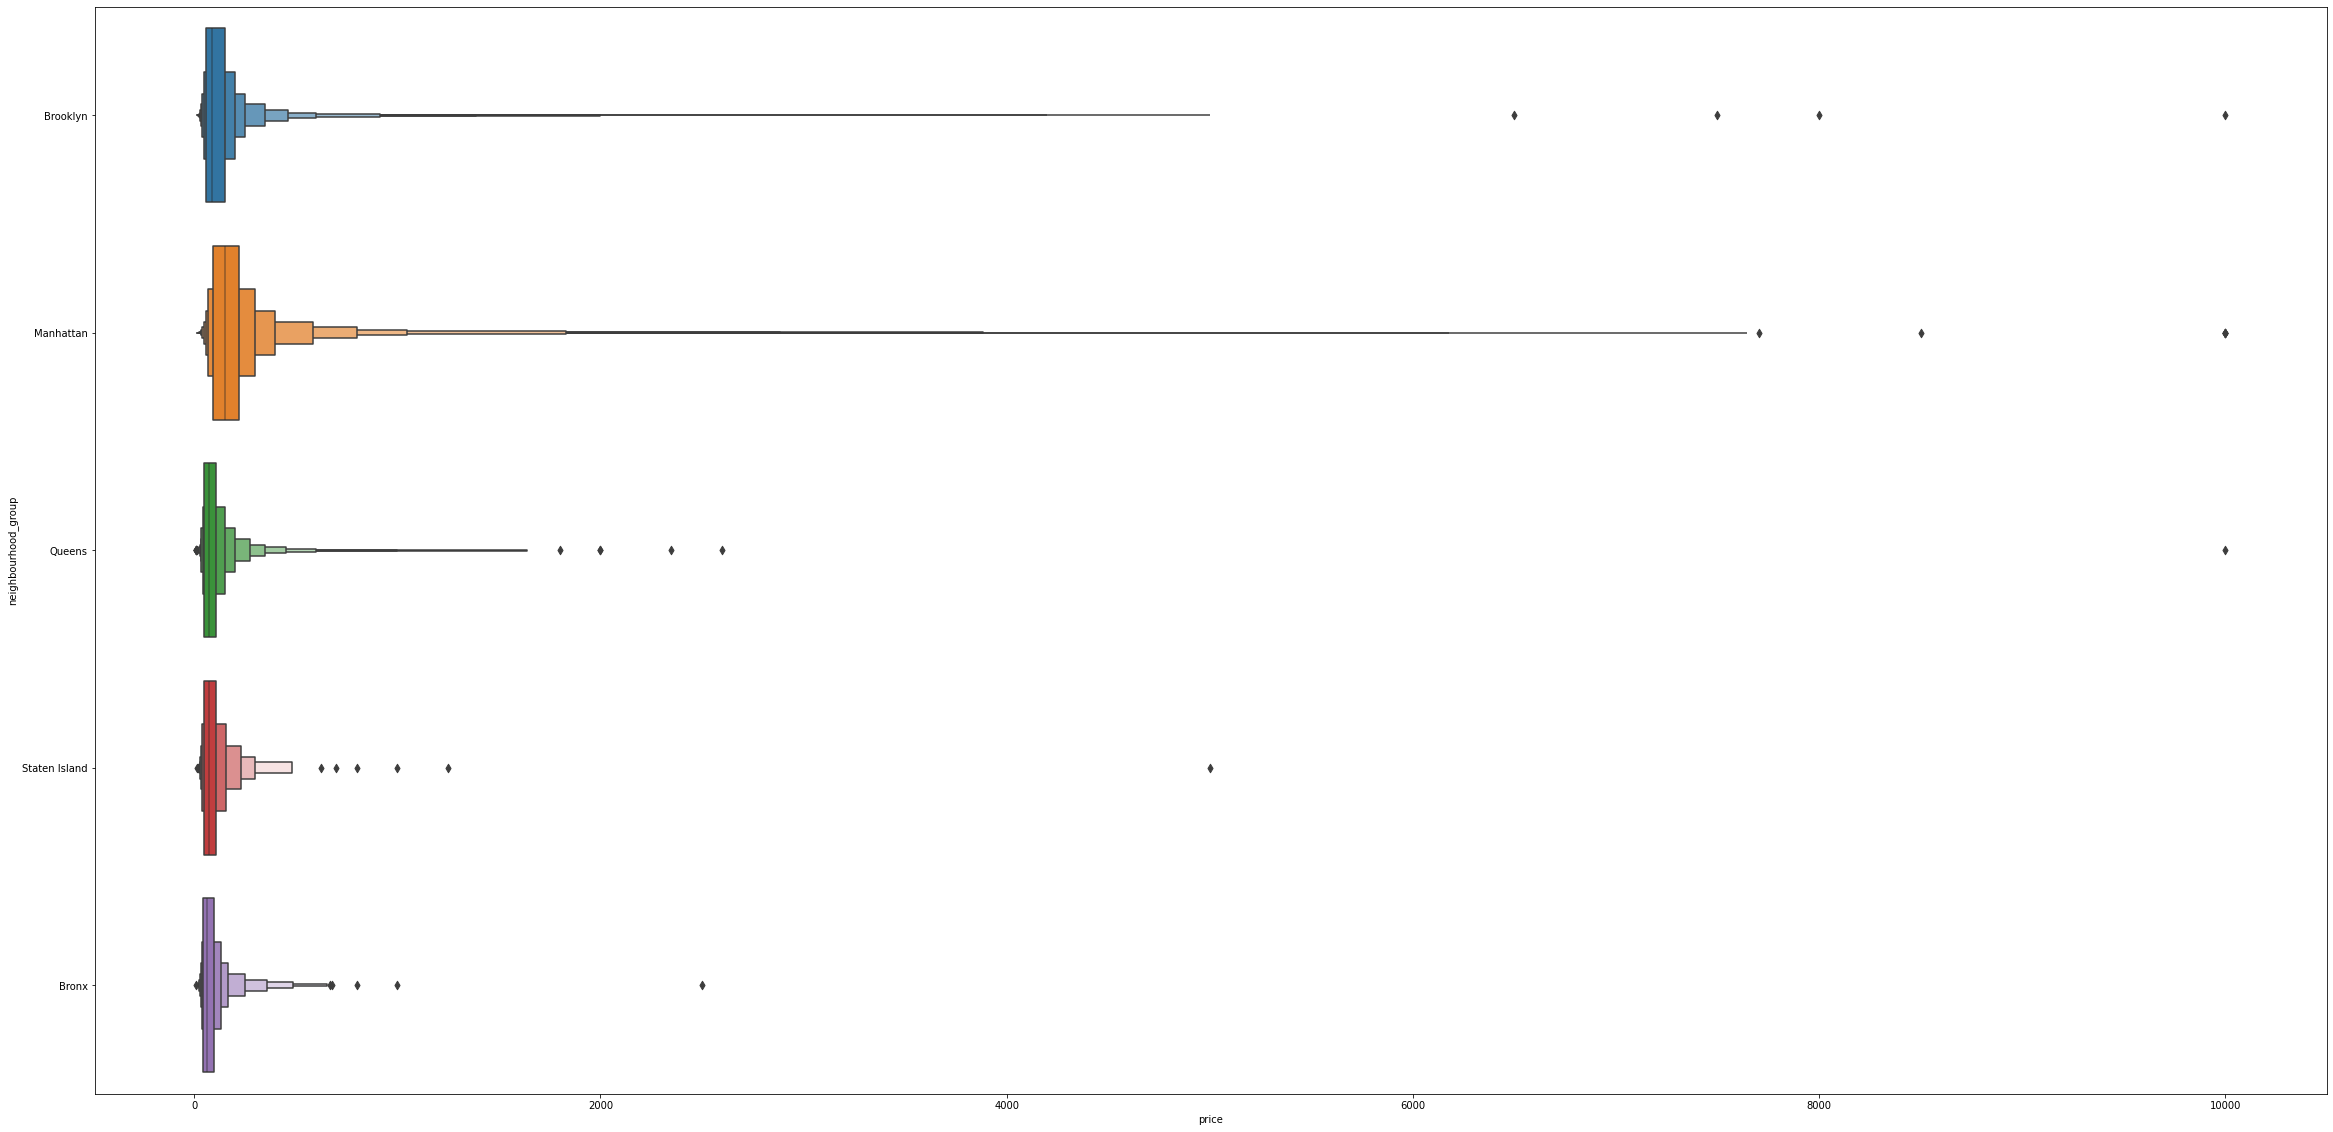

In [140]:
fig=plt.figure(figsize=(40,20))
g=sns.boxenplot(data=df,y='neighbourhood_group',x='price')
fig.show(g)

In [141]:
#@title Default title text
# Most Expensive host with less availability
df.loc[df['availability_365']==0].sort_values(by='price',ascending =False).groupby(by='neighbourhood_group').head(1)[['name','host_id',	'host_name',	'neighbourhood_group','room_type',	'price']]

,name,host_id,host_name,neighbourhood_group,room_type,price
17692,Luxury 1 bedroom apt. -stunning Manhattan views,5143901,Erin,Brooklyn,Entire home/apt,10000
9151,Furnished room in Astoria apartment,20582832,Kathrine,Queens,Private room,10000
6530,Spanish Harlem Apt,1235070,Olson,Manhattan,Entire home/apt,9999
3049,Spacious center hall colonial,9430973,Donna,Staten Island,Entire home/apt,700
8521,1 Room in a 2 Bedroom Available,7074531,Jonathan,Bronx,Private room,680


* In this Survey we have tried to find the most expensive as well as busiest host of all
* Erin from brooklyn comes out to be the winner here. She has luxurious one bedroom apartment with stunning Manhatten views. She is the most busiest host of all due to which the rent is on higher side (Demand-Supply Concept).












In [142]:
# Top 10 host with high profit
top_10_host=df.groupby(by=['host_name','host_id']).agg({'price':'sum'}).sort_values(by='price',ascending=False)
top_10_host.head(10)

,,price
host_name,host_id,
Sonder (NYC),219517861,82795
Blueground,107434423,70331
Sally,156158778,37097
Red Awning,205031545,35294
Kara,30283594,33581
Sonder,12243051,20451
Jeremy & Laura,16098958,20060
Henry,836168,19500
Pranjal,200380610,18865




* Here we have tried to find the top 10 most profitable hosts of all.
* This survey will help the company to do the behavioural analysis on customer preference while chosing the host. It will allow the company to adept the practices followed by these top 10 host and will apply the same on other host who are not so profitable.



In [143]:
# Total no. of nights spend per room types

total_room=df.groupby(by='room_type')['minimum_nights'].sum().reset_index()
total_room

,room_type,minimum_nights
0,Entire home/apt,210250
1,Private room,117696
2,Shared room,6519




* In this survey we have done the analysis to find the preference of the customers with regards to the choice of type of rooms for their stay.
* Surprisingly even after the high cost customers have preferred the entire home (63%) for their stay followed by private room (35%) and least preffered is shared rooms (2%)
* This behavior of customer indicates the luxury lifestyle of NYC and also that customer takes his privacy seriously and is ready for paying luxury amount for the same.






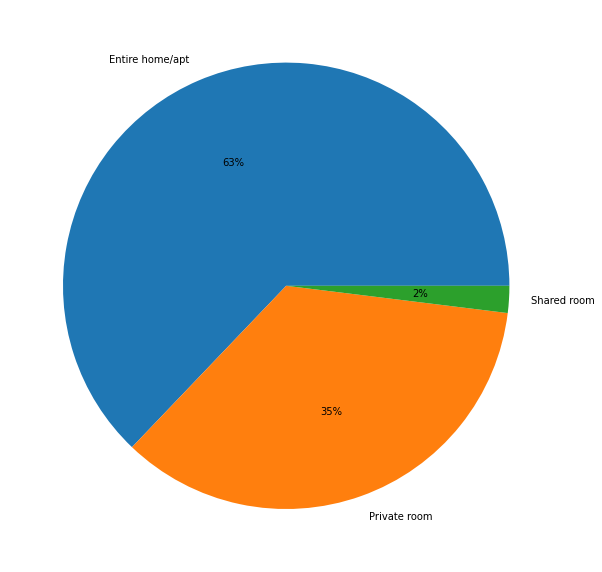

In [144]:
fig=plt.figure(figsize=(10,20))
plt.pie(x=total_room['minimum_nights'],labels=total_room['room_type'],autopct='%.0f%%')
fig.show()

In [145]:
#Most Expensive hosts in neighbourhood_group which are suitable for business meeting?
df.sort_values(by='price',ascending=False).groupby(by='neighbourhood_group').head(1)[['name','host_id',	'host_name',	'neighbourhood_group','room_type',	'price']]

,name,host_id,host_name,neighbourhood_group,room_type,price
29238,1-BR Lincoln Center,72390391,Jelena,Manhattan,Entire home/apt,10000
17692,Luxury 1 bedroom apt. -stunning Manhattan views,5143901,Erin,Brooklyn,Entire home/apt,10000
9151,Furnished room in Astoria apartment,20582832,Kathrine,Queens,Private room,10000
22353,Victorian Film location,2675644,Alissa,Staten Island,Entire home/apt,5000
24477,"""The luxury of Comfort""",131826530,Kathy,Bronx,Private room,2500




* In this survey we are finding the most expensive host available in the neighbourhood group that are available for business meetings.
* Here not to our surprise Manhatten appears on top of our results as Manhattan is home to the world's two largest stock exchanges by total market capitalization, the New York Stock Exchange and Nasdaq. Many multinational media conglomerates are based in Manhattan, and the borough has been the setting for numerous books, films, and television shows. Manhattan real estate is among the most expensive in the world.



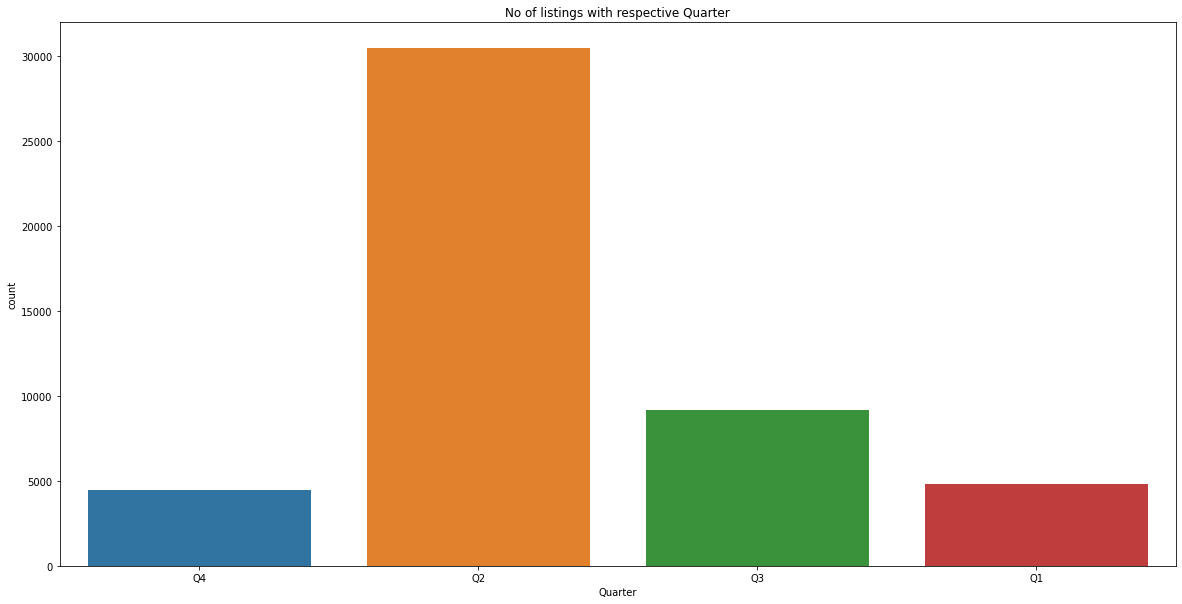

In [146]:
# Which quarter has most number of listings 
fig=plt.figure(figsize=(20,10))
g=sns.countplot(data=df,x='Quarter')
plt.title('No of listings with respective Quarter')
fig.show(g)



* In this survey we are analysing the data to find the busiest quarter in terms of listings in NYC
* Q2 has been the most busiest quarter of all in terms of listings because in NYC peak season months (May to September) offer high inventory, equaling more choices.
* The best time of the year to rent in NYC is between late spring and early summer. This is true for most people as more apartments hit the market for rent from May-July than any other time of the year.






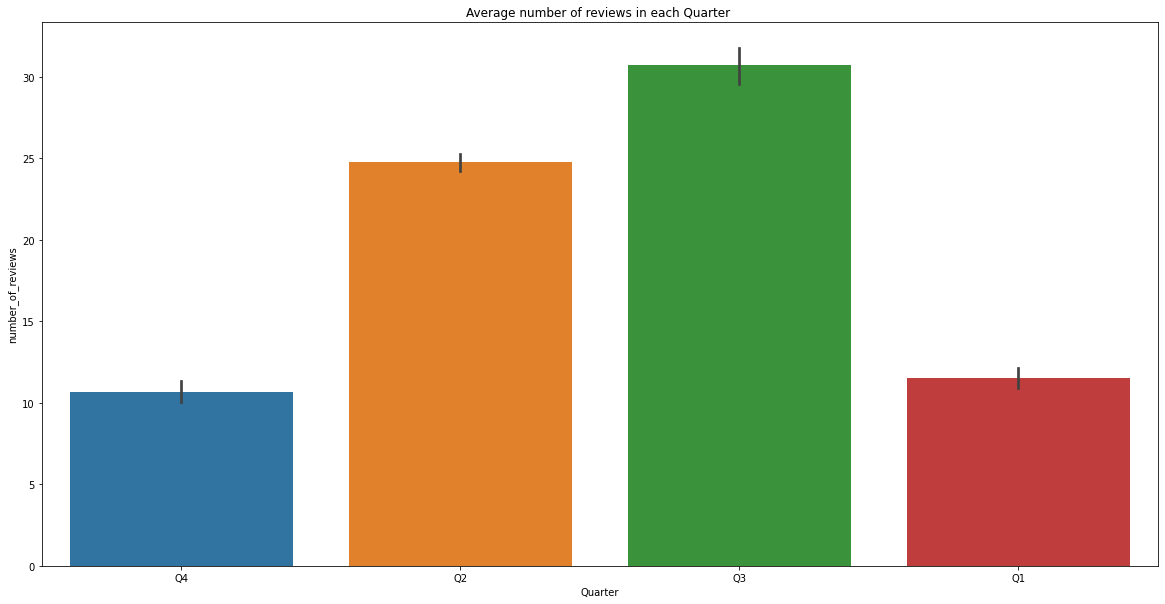

In [147]:
 # Which quarter has most  avg number of reviews

fig=plt.figure(figsize=(20,10))
g=sns.barplot(data=df,x='Quarter',y='number_of_reviews',estimator=np.mean)
plt.title('Average number of reviews in each Quarter ')
fig.show(g)

* Quarter 3 has the highest average in number of reviews then followed by Quarter 2. Because most number of Host listings are done during Q2 and Q3




In [148]:
# avg availbility of each quarter wrt ng
data=df.groupby(by=['neighbourhood_group','Quarter'])
df.groupby(by=['neighbourhood_group','Quarter']).agg({'availability_365':'mean'})

availability_365
neighbourhood_group Quarter                  
Bronx               Q1             166.309524
                    Q2             172.739071
                    Q3             157.311005
                    Q4             114.393939
Brooklyn            Q1              64.812950
                    Q2             114.181400
                    Q3              95.709114
                    Q4              59.394130
Manhattan           Q1              73.025618
                    Q2             128.084059
                    Q3              95.470540
                    Q4              74.850992
Queens              Q1              94.596491
                    Q2             154.636236
                    Q3             148.877893
                    Q4              97.990196
Staten Island       Q1             187.550000
                    Q2             203.085837
                    Q3             201.768421
                    Q4             169.680000

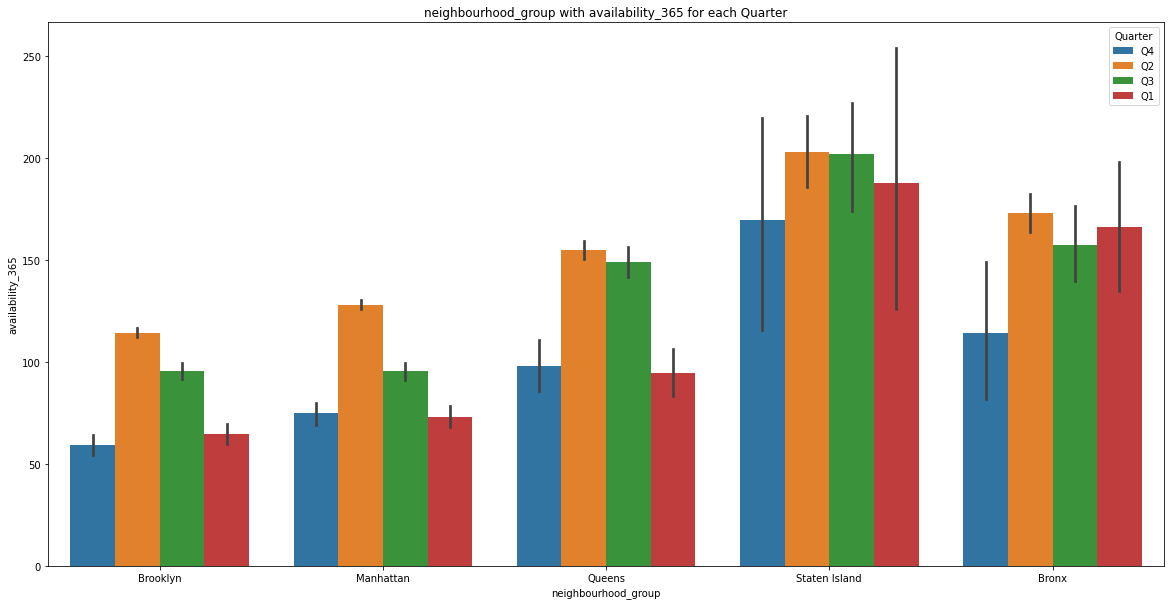

In [149]:
fig=plt.figure(figsize=(20,10))
g=sns.barplot(data=df,y='availability_365',x='neighbourhood_group',hue='Quarter',estimator=np.mean)
plt.title('neighbourhood_group with availability_365 for each Quarter')
fig.show(g)

* Brooklyn and Manhattan has the least avgerage availability among all neighbourhood_group
* The Host is Staten island have highest average availability among all neighbourhood_group
* In all neighbourhood_group Q1 and Q4 have least average availability
* In all neighbourhood_group Q2 has the highest average availibility





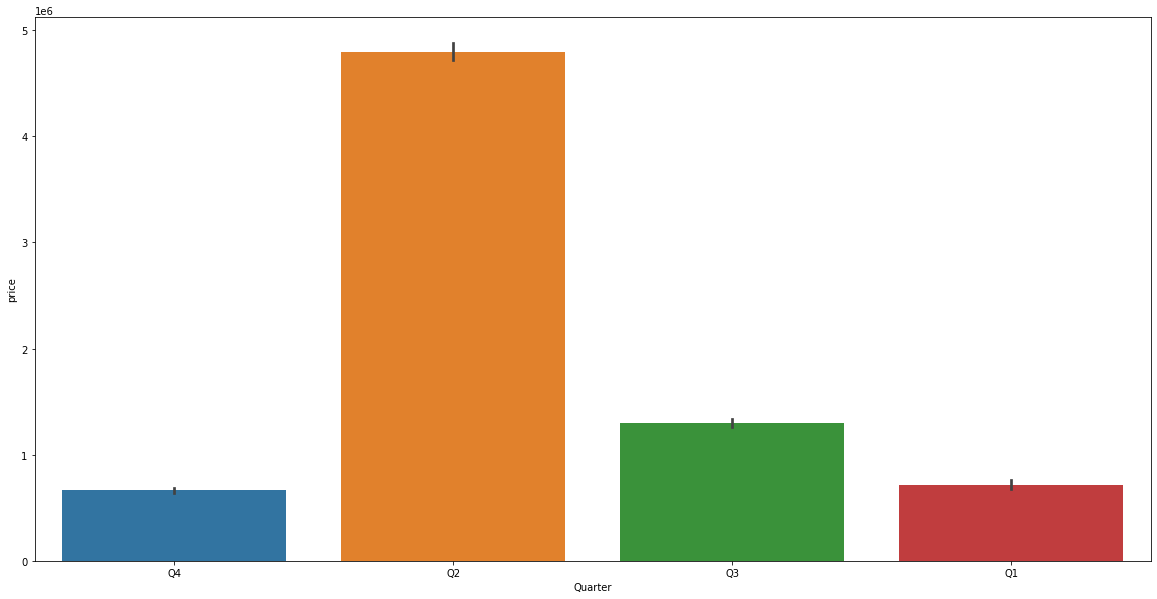

In [150]:
# which quarter have the highest profits earned
fig=plt.figure(figsize=(20,10))
g=sns.barplot(data=df,x='Quarter',y='price',estimator=sum)
fig.show(g)

* According to the Graph the profits in Quarter 2 is more than any other which is in the months of April, May,June. Which is generally a summer vacation time for the people so they came to enjoy .
* The starting of the financial Year. So many new business deals and stays will be done during these period in New York City .
* During these period the sports events like NFL, NBA, and WrestleMania will be held in NYC .








In [151]:
#  Expensive host in each quarter
df.sort_values(by='price',ascending=False).groupby(by='Quarter').head(1)[['name','host_id',	'host_name',	'neighbourhood_group','room_type',	'price','Quarter']]

,name,host_id,host_name,neighbourhood_group,room_type,price,Quarter
29238,1-BR Lincoln Center,72390391,Jelena,Manhattan,Entire home/apt,10000,Q2
17692,Luxury 1 bedroom apt. -stunning Manhattan views,5143901,Erin,Brooklyn,Entire home/apt,10000,Q3
9151,Furnished room in Astoria apartment,20582832,Kathrine,Queens,Private room,10000,Q1
26739,Broadway 1,153497815,Sarah-B,Brooklyn,Entire home/apt,5000,Q4


The most expensive host for each Quarter are and the reasons why those are expensive

* 1-BR at Lincoln Center because it has stunning views central park in Quater 2 becasue Spring in Manhattan is so good
* Luxury 1 bedroom apt. -stunning Manhattan views in Quarter 3 which is summer and autumn
* Furnished room in Astoria apartment in Quarter 1 , it's a winter time and new year time . So seeing Firework on New Year over the East river will be so good
* Broadway 1 which is in brooklyn and near to church in the time of Christmas and Halloween









In [152]:
data=df.drop(columns=['host_id','latitude','longitude'])

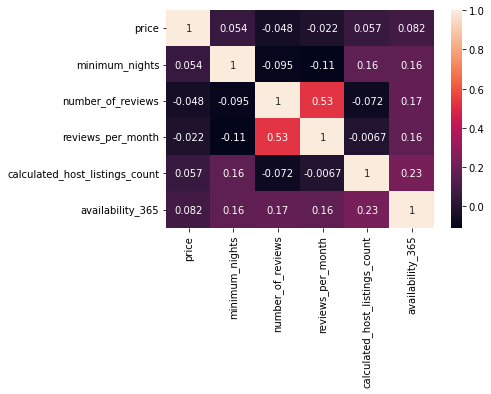

In [153]:
# what is the correlation between features
sns.heatmap(data.corr(),annot=True)

* we can see their is only 53% correlation between the features reviewa_per_mont abd number_of_reviews
* all the continues features are very less correlated and some are neagtively correlated





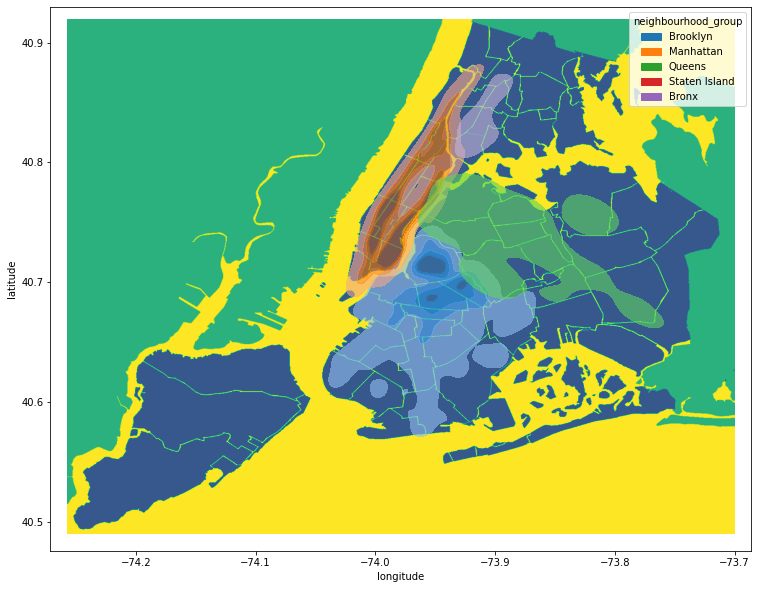

In [157]:
# find which part of NYC has more number of listings and their geographical advantages?
fig=plt.figure(figsize=(20,10))
nyc_map=plt.imread('/content/drive/MyDrive/Almabetter/capstone project/module - 1 python/Neighbourhoods_New_York_City_Map.png',0)
plt.imshow(nyc_map,zorder=0,extent=[-74.258, -73.7, 40.49,40.92])

g=sns.kdeplot(data=df,x='longitude',y='latitude',levels=5,
    fill=True,
    alpha=0.6,
    cut=2,
    hue='neighbourhood_group' 

    )
fig.show(g)

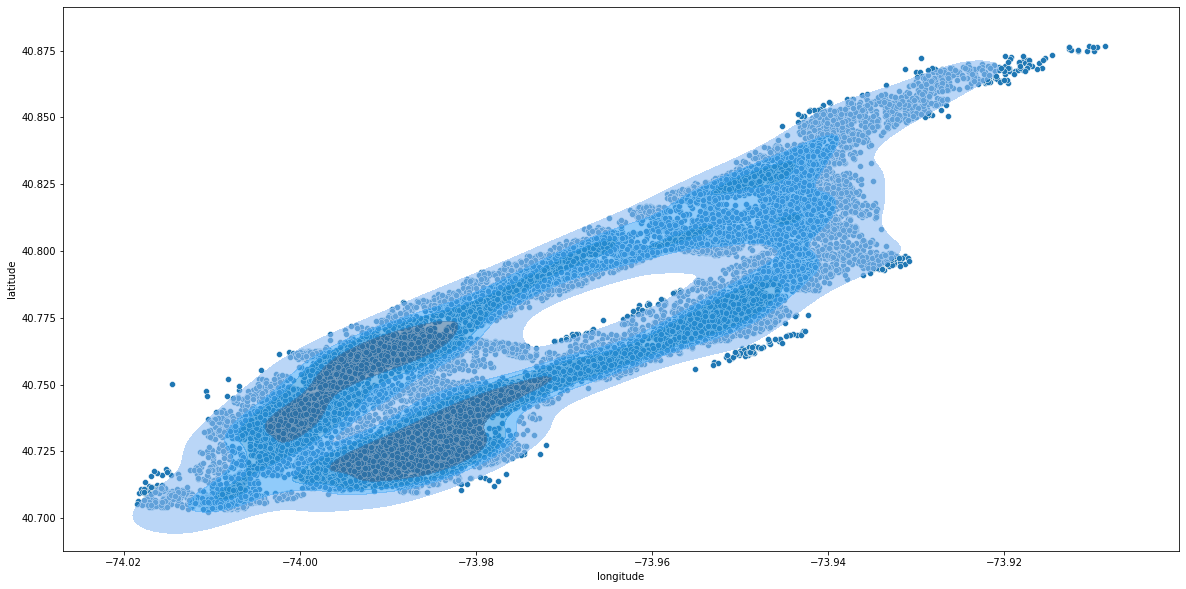

In [155]:
data=df.loc[df['neighbourhood_group']=='Manhattan']
fig=plt.figure(figsize=(20,10))
sns.scatterplot(data=data,x='longitude',y='latitude')
sns.kdeplot(data=data,x='longitude',y='latitude',levels=5,
    fill=True,
    alpha=0.6,
    cut=2,
    
    )
fig.show()

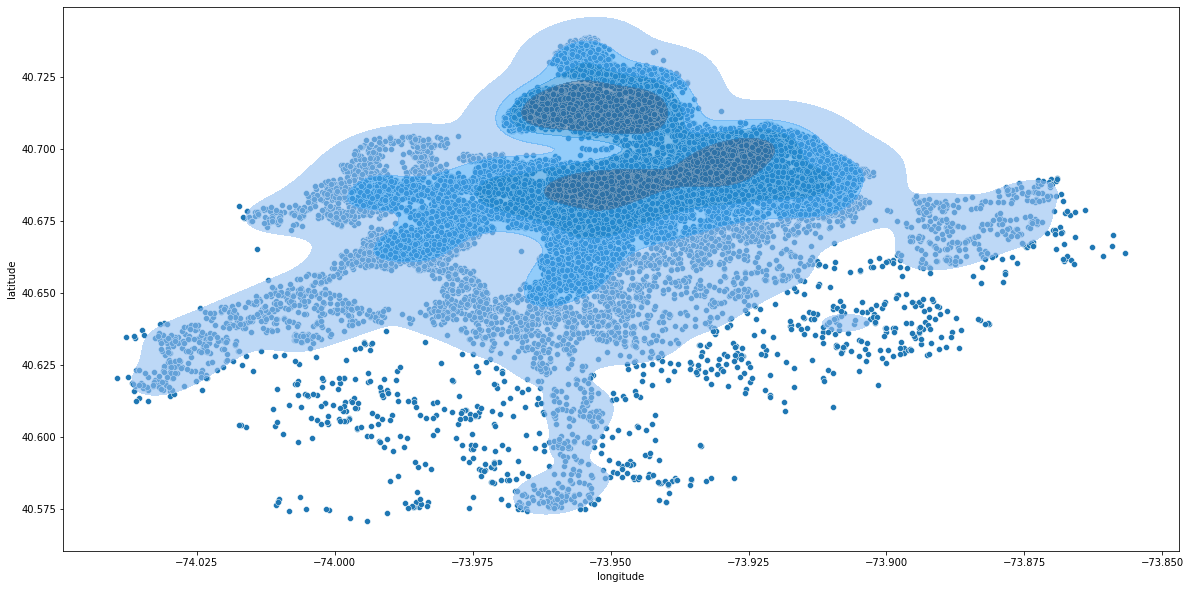

In [156]:
data=df.loc[df['neighbourhood_group']=='Brooklyn']
fig=plt.figure(figsize=(20,10))
sns.scatterplot(data=data,x='longitude',y='latitude')
sns.kdeplot(data=data,x='longitude',y='latitude',levels=5,
    fill=True,
    alpha=0.6,
    cut=2,
    
    )
fig.show()

* We can see two hotspots in Manhattan and two in Brooklyn . These hotspots say about the area with most number of listing in these area .
* The hotspots in Brooklyn and their Geographical advantages
* The first hotspot is Greenpoint which is on the bank of East river and the host in these area will get the amazing view of Manhattan's skyscraper and the East river.
* The next hotspot in Brooklyn is Bedford-Stuyvesant. These area comes in central of Brooklyn . From here we can go to anypart of New York City within a 1hr time.
* The Hotspot in Manhattan and Their Geographical advantages These hotspots in Manhattan are mostly around the Central Park and mostly these are apartments in Skyscrapers with the view of Central Park and the Hudson River.












